# About the Project

<h2>Table of Content </h2>


- [Import Libraries](#Import_Libraries)
- [Read Data from Data Folder](#Read_data)
- [User Overview Analysis](#user_overview)
 - [Task 1.1](#task1)

In [5]:
# import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# import statistical libraries
from scipy import stats
from scipy.stats import norm

# import machine learning libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, normalize, PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE



import xgboost as xgb


import time

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

<h5><a id = "Read_data"> Read Data from File </a></h5>

In [6]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [7]:
df.shape

(41188, 21)

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
def list_datatype(df):
    
    num = []
    cat = []
    
    for feature in df.columns:
        if df[feature].dtype in ['object',]:
            cat.append(feature)
        if df[feature].dtype in ['float','int','int64','int32']:
            num.append(feature)
            
    return num, cat
    

In [10]:
# list_datatype returns a tuple of numerical and categorical columns respectively 

num , cat = list_datatype(df)

In [11]:
def total_missing(df, col):
    
    return df[col].isna().sum()

In [12]:
total_missing(df, cat)

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
y              0
dtype: int64

In [13]:
total_missing(df, num)

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [14]:
df[cat].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [15]:
df[num].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [16]:
def unique_values(df, col):
    for c in col:
        print(f'Unique values of {c.upper()} column are:\n {df[c].unique()} \n')

In [17]:
unique_values(df, cat)    

Unique values of JOB column are:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

Unique values of MARITAL column are:
 ['married' 'single' 'divorced' 'unknown'] 

Unique values of EDUCATION column are:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

Unique values of DEFAULT column are:
 ['no' 'unknown' 'yes'] 

Unique values of HOUSING column are:
 ['no' 'yes' 'unknown'] 

Unique values of LOAN column are:
 ['no' 'yes' 'unknown'] 

Unique values of CONTACT column are:
 ['telephone' 'cellular'] 

Unique values of MONTH column are:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

Unique values of DAY_OF_WEEK column are:
 ['mon' 'tue' 'wed' 'thu' 'fri'] 

Unique values of POUTCOME column are:
 ['nonexistent' 'failure' 'success'] 

Unique values of Y column are:
 ['no' 'yes'] 



In [18]:
def cat_freq(df, cat):
    for c in cat:
        print(f'There are {df[c].nunique()} values in {c.upper()} and their unique values are: \n')
        print(f'{dict(df[c].value_counts())} \n')

In [19]:
cat_freq(df, cat)

There are 12 values in JOB and their unique values are: 

{'admin.': 10422, 'blue-collar': 9254, 'technician': 6743, 'services': 3969, 'management': 2924, 'retired': 1720, 'entrepreneur': 1456, 'self-employed': 1421, 'housemaid': 1060, 'unemployed': 1014, 'student': 875, 'unknown': 330} 

There are 4 values in MARITAL and their unique values are: 

{'married': 24928, 'single': 11568, 'divorced': 4612, 'unknown': 80} 

There are 8 values in EDUCATION and their unique values are: 

{'university.degree': 12168, 'high.school': 9515, 'basic.9y': 6045, 'professional.course': 5243, 'basic.4y': 4176, 'basic.6y': 2292, 'unknown': 1731, 'illiterate': 18} 

There are 3 values in DEFAULT and their unique values are: 

{'no': 32588, 'unknown': 8597, 'yes': 3} 

There are 3 values in HOUSING and their unique values are: 

{'yes': 21576, 'no': 18622, 'unknown': 990} 

There are 3 values in LOAN and their unique values are: 

{'no': 33950, 'yes': 6248, 'unknown': 990} 

There are 2 values in CONTACT a

In [20]:
#unknown = df[['job','marital','education','default','housing','loan']]
# this columns contain unknown values. 

In [21]:
def catplot(x,data):
    plot= sns.catplot(x, kind="count", data=data, palette="Set3", order = data[x].value_counts().index ,size = 8)
    plt.xticks(rotation=45, horizontalalignment='right' )
    plt.title("counts"+ " "+ "of" + " "+ " " + x )
    return 

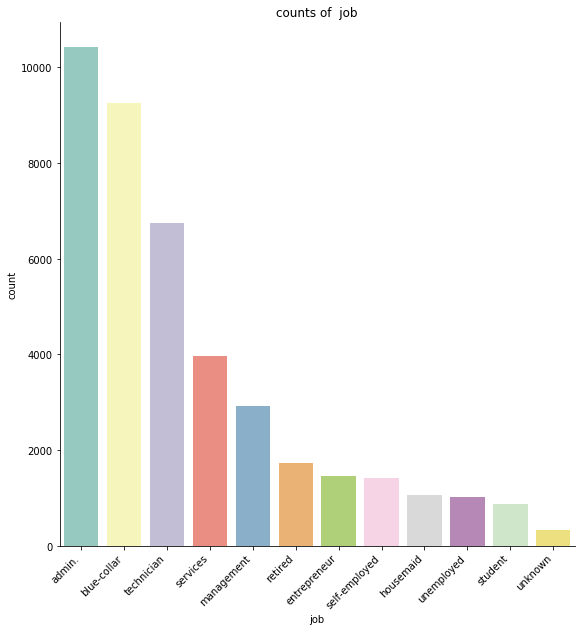

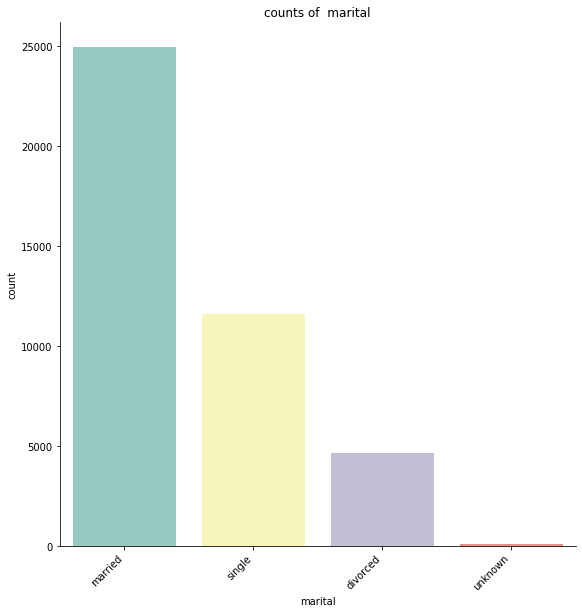

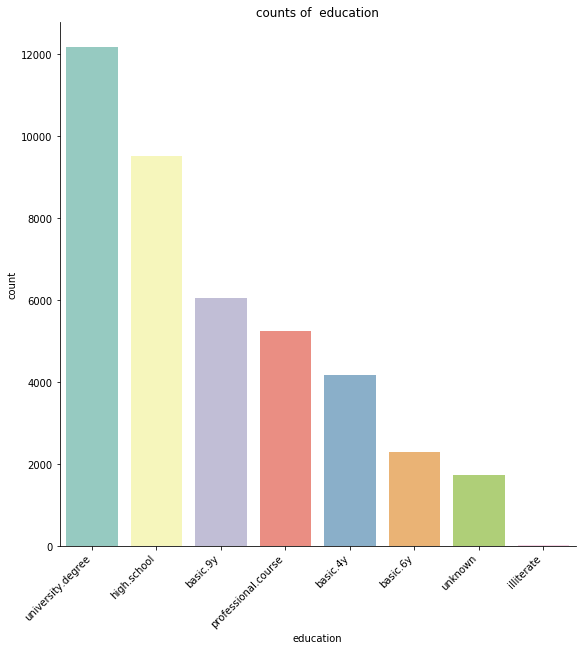

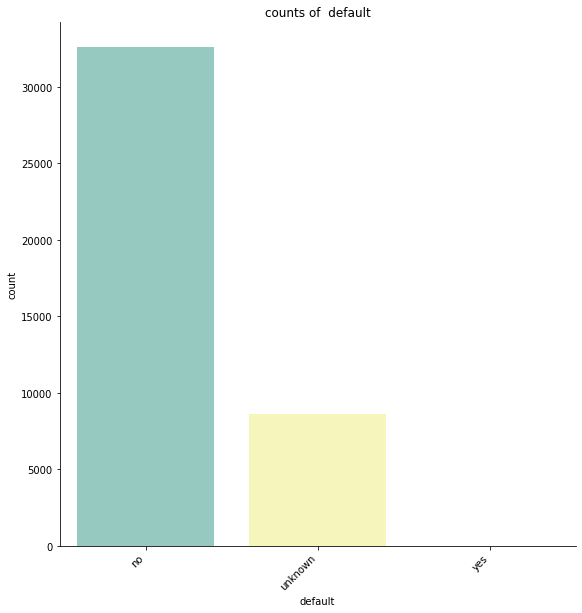

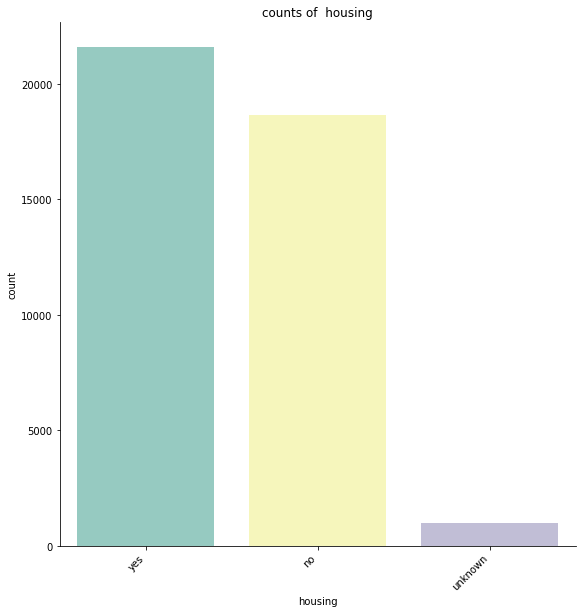

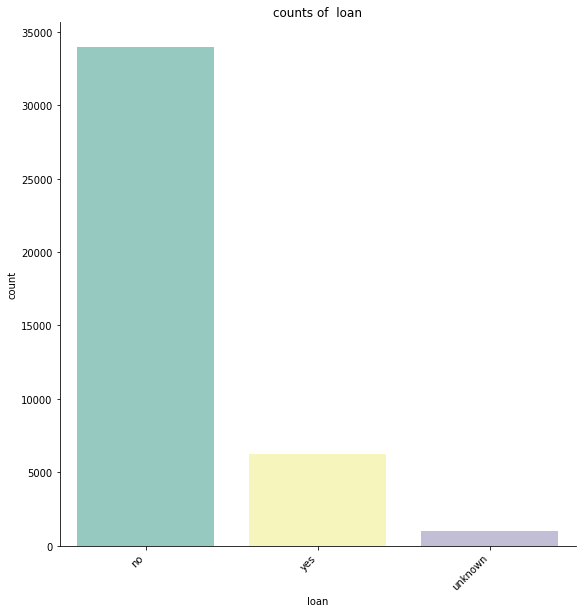

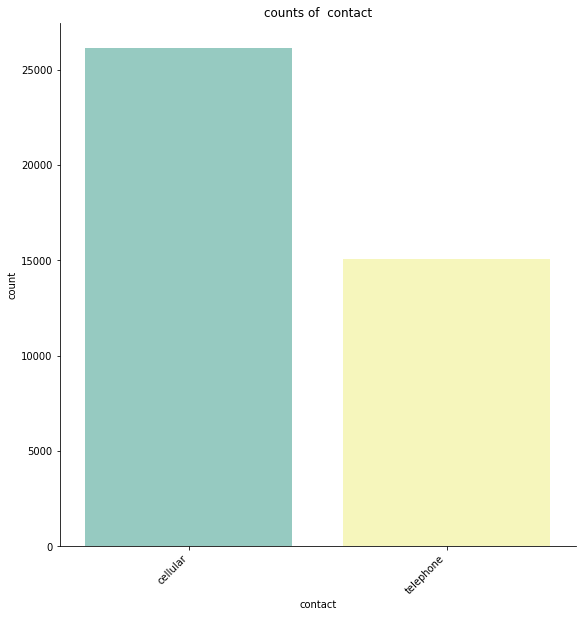

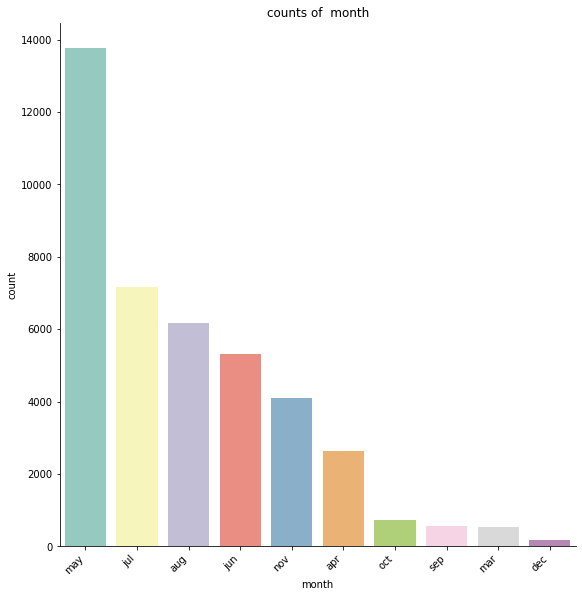

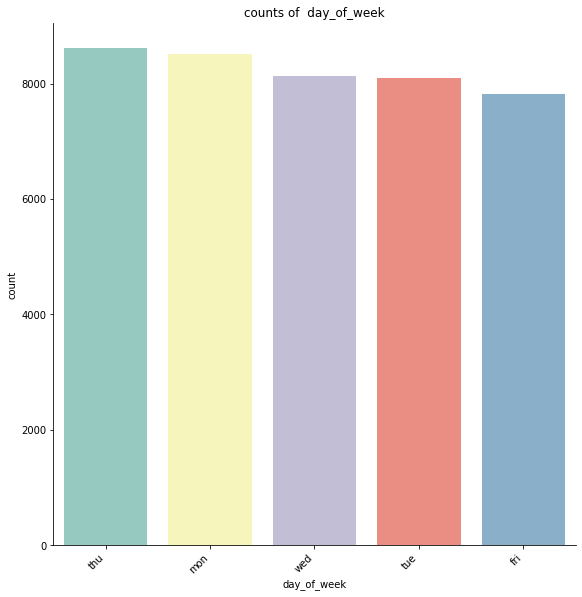

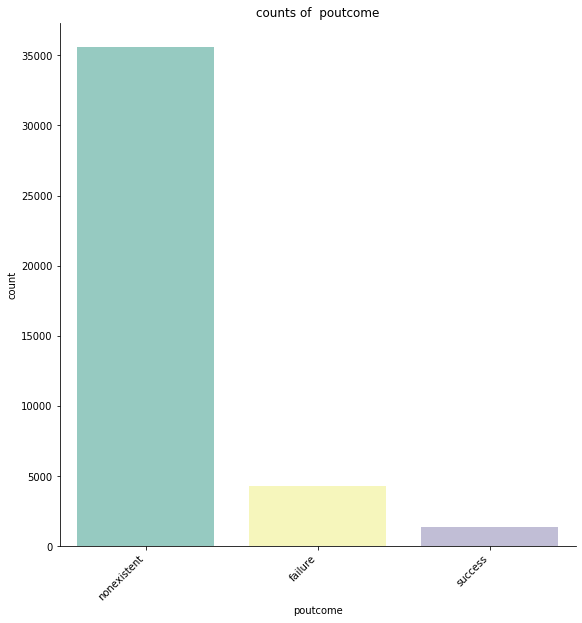

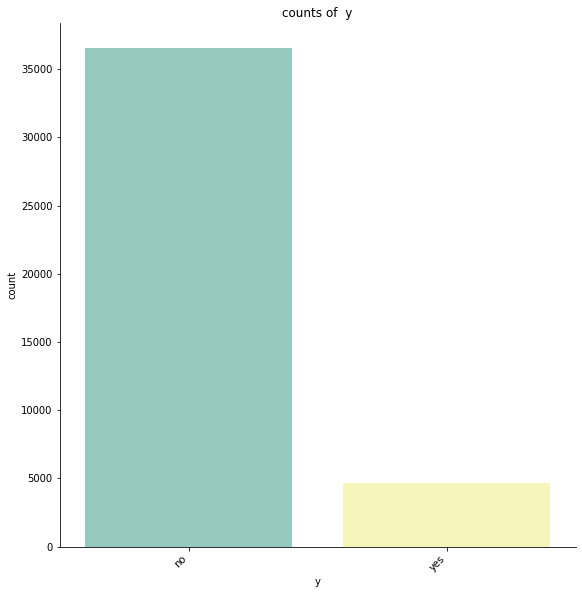

In [22]:
for c in cat:
    catplot(c, data=df)

In [23]:
def dist(col, data, hist = True , kde = False, size = 8): 

    plot = sns.distplot(data[col], hist = hist, kde = kde)
    plt.title("Distribution"+ " "+ "of" + " "+ " " + c.upper() )
    plt.show()
    return 

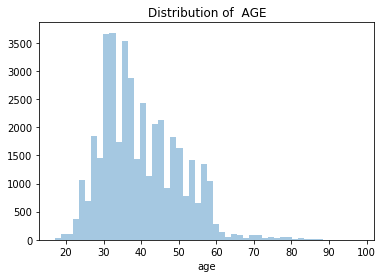

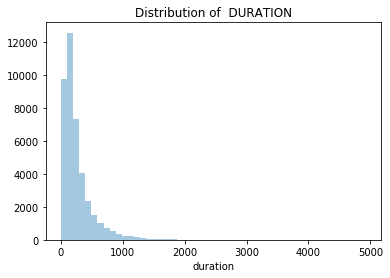

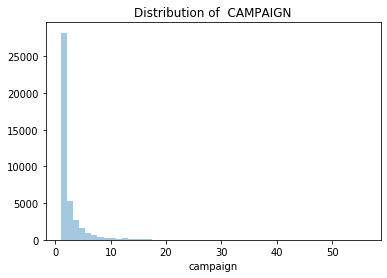

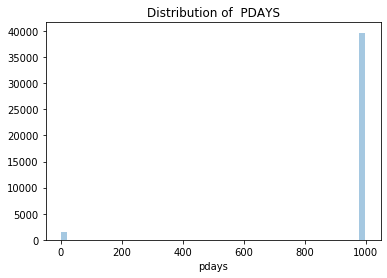

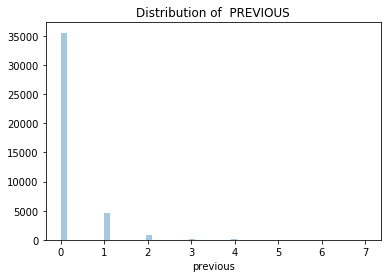

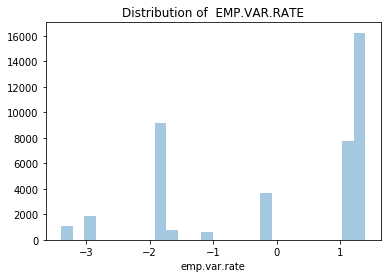

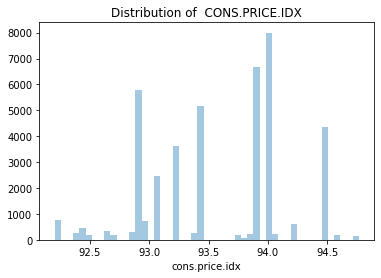

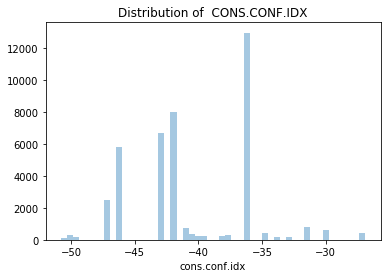

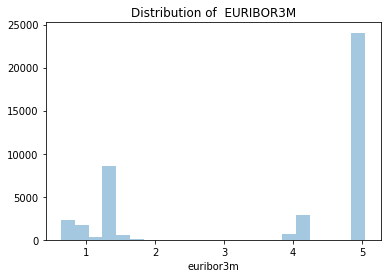

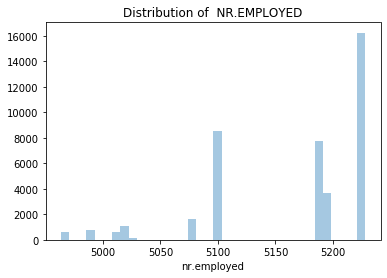

In [24]:
for c in num:
    dist(col = c, data = df, hist = True)

In [25]:
def boxplot(x, data):
    plot = sns.boxplot(x= x , data= data)
    plt.title("Boxplot of " + " " + x.upper())
    plt.show()
    return plot

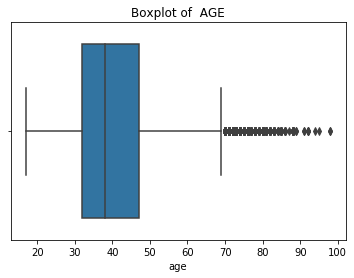

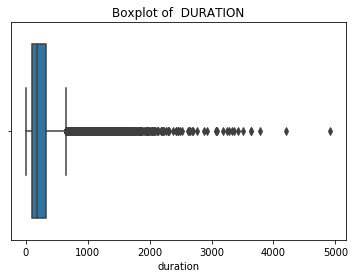

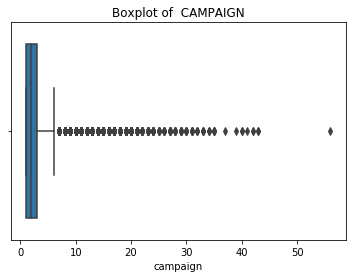

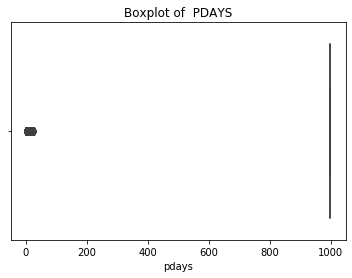

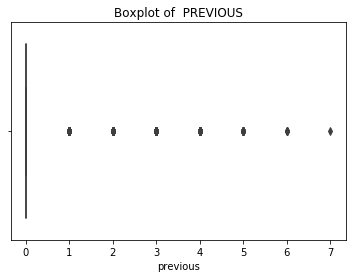

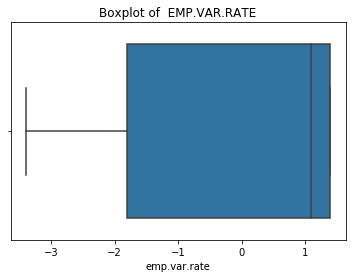

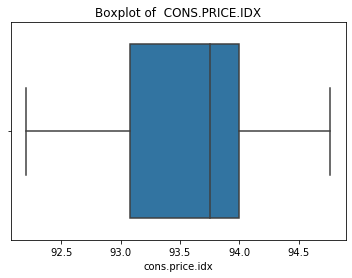

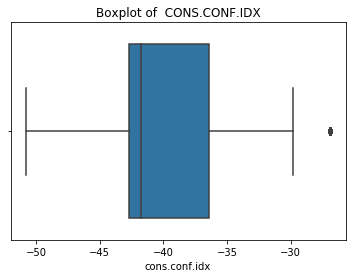

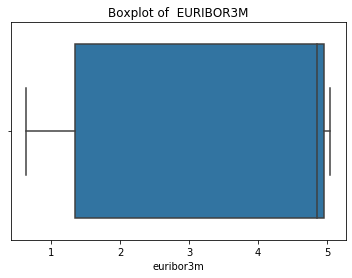

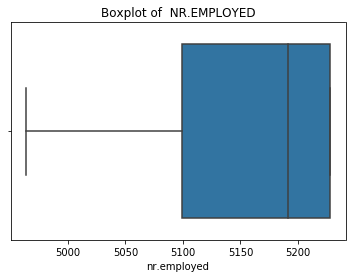

In [26]:
for col in num:
    boxplot(col, data = df)

In [27]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


<h3> PreProcessing </h3>

In [29]:
#jobs = {'A':['housemaid','blue_collar','technician'],'B':['admin','management'],\
#        'C' :['retired','student','unknown'],'D':['entrepreneur','self-employed'],\
#       'E':'services'}

jobs = {'housemaid':'A','blue-collar':'A','technician':'A','admin.':'B','management':'B',\
       'retired':'C','student':'C','unknown':'C','entrepreneur':'D','self-employed':'D',\
       'services':'E','unemployed' : 'C'}

df['job2'] = df['job'].map(jobs)

In [30]:
df.drop(df[df['marital'] == 'unknown'].index, inplace = True)

In [31]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [32]:
education = {'basic.4y':'E1','basic.6y':'E1','basic.9y':'E1',\
            'high.school':'E1','university.degree':'E2',\
             'professional.course':'E2', 'unknown' : 'E3', 'illiterate' : 'E3'}

In [33]:
df['education2'] = df['education'].map(education)

In [34]:
df[(df['loan'] == 'unknown') & (df['y'] == 'yes')].shape

(107, 23)

In [35]:
df[(df['housing'] == 'unknown') & (df['y'] == 'yes')].shape

(107, 23)

In [36]:
(df['housing'] == 'unknown').sum()

989

In [37]:
(df['loan'] == 'unknown').sum()

989

In [38]:
months = {'mar':'Q1','apr' : 'Q1' ,'may' : 'Q1', 'jun' : 'Q2', 'jul' : 'Q2',\
         'aug' : 'Q2', 'sep' : 'Q3', 'oct' : 'Q3', 'nov' : 'Q3', 'dec' : 'Q3'}

In [39]:
df['months_new'] = df['month'].map(months)

In [40]:
df['age_cut'] = pd.cut(x=df['age'], bins=[16, 30, 45, 60,100], labels=['20s', '30s', '40s','60s'])

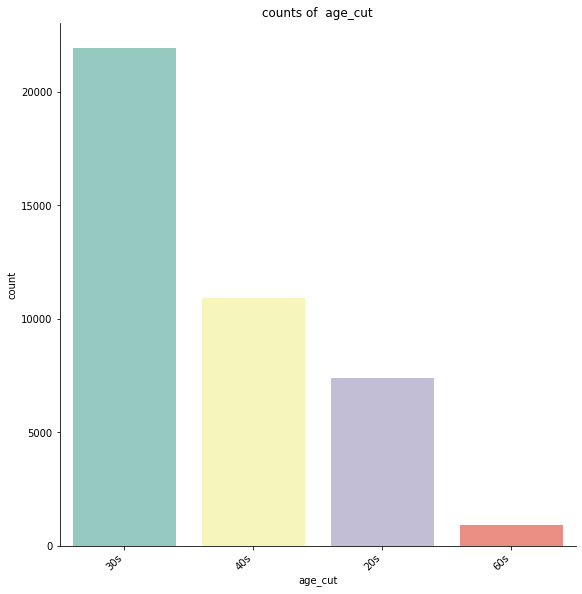

In [41]:
catplot('age_cut', df)

In [42]:
df.loc[df['campaign'] > 15, 'campaign'] = 15

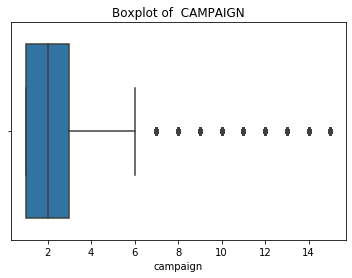

In [43]:
boxplot('campaign', df)

In [44]:
df['pdays'] =  df['pdays'] + 1
df['pdays'].replace({1000:0}, inplace = True)

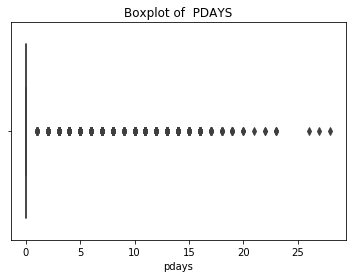

In [45]:
boxplot('pdays', df)

In [46]:
df2 = df.drop(['age','duration','job','education','month','day_of_week'], axis = 1)

In [47]:
num, cat = list_datatype(df2)

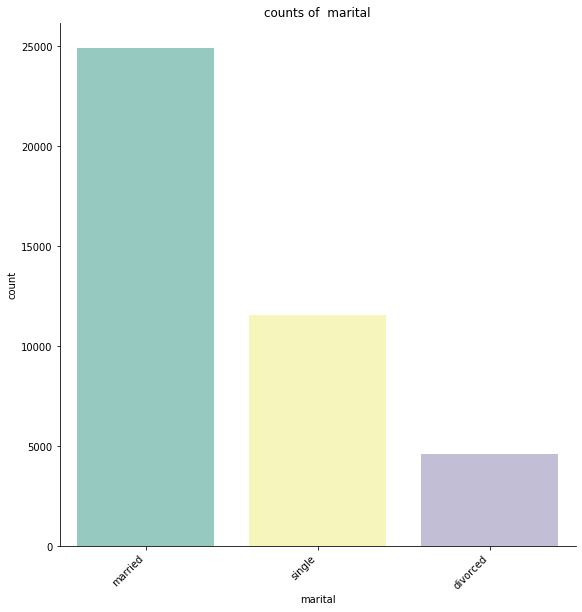

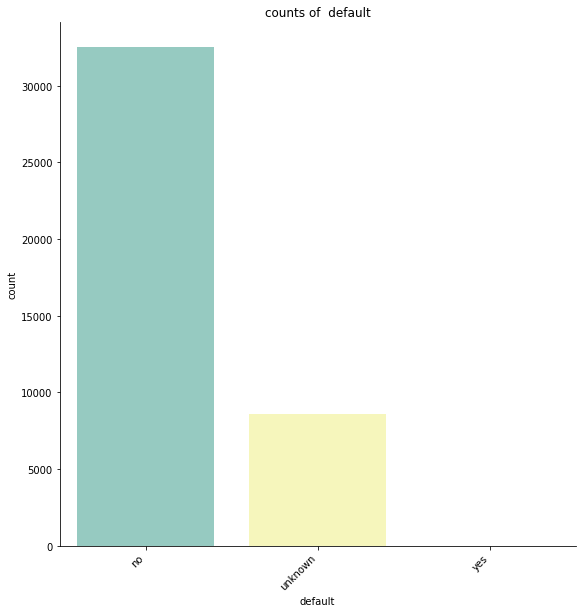

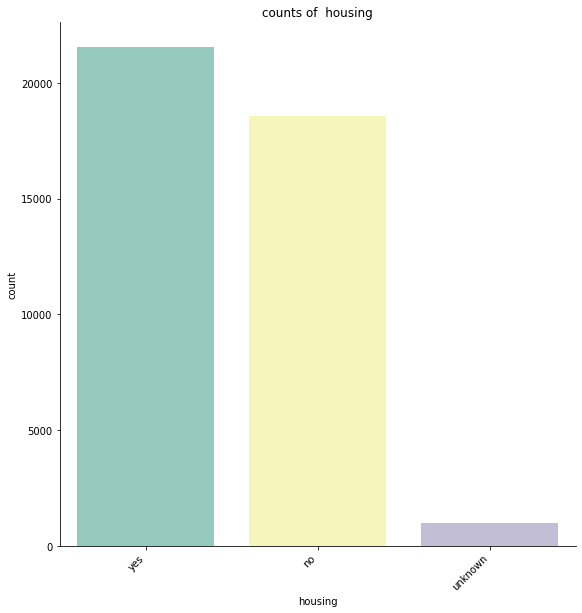

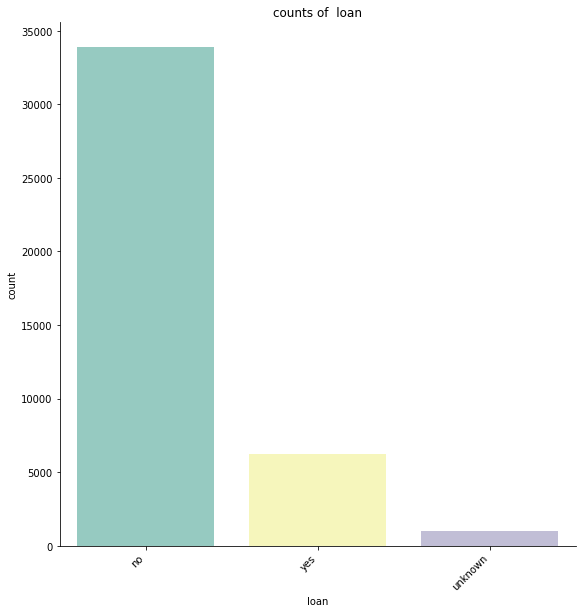

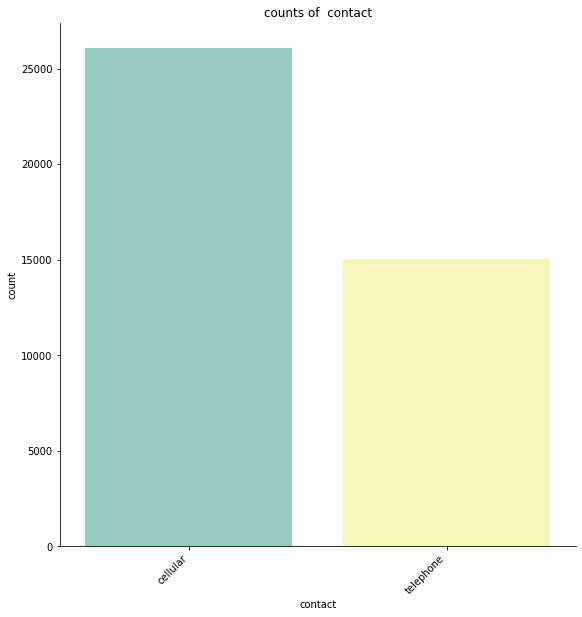

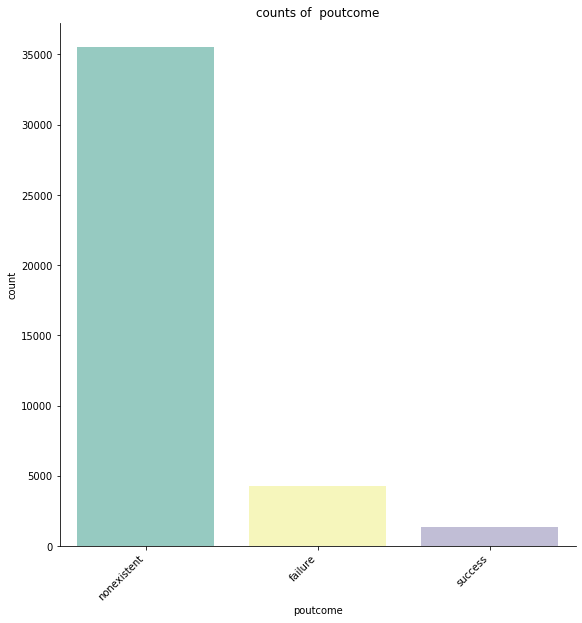

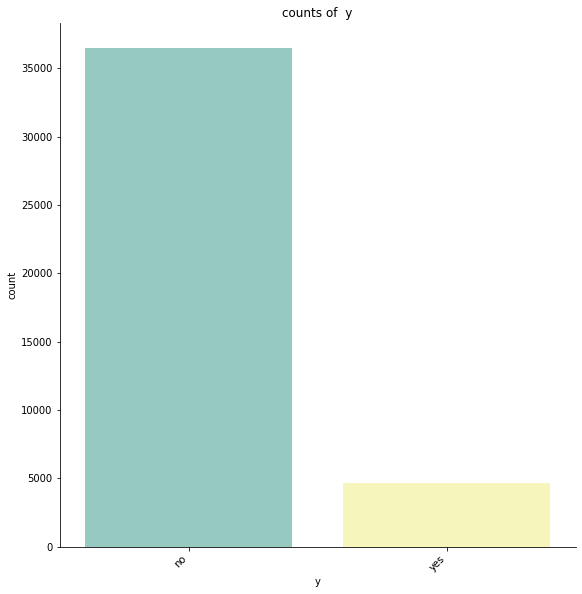

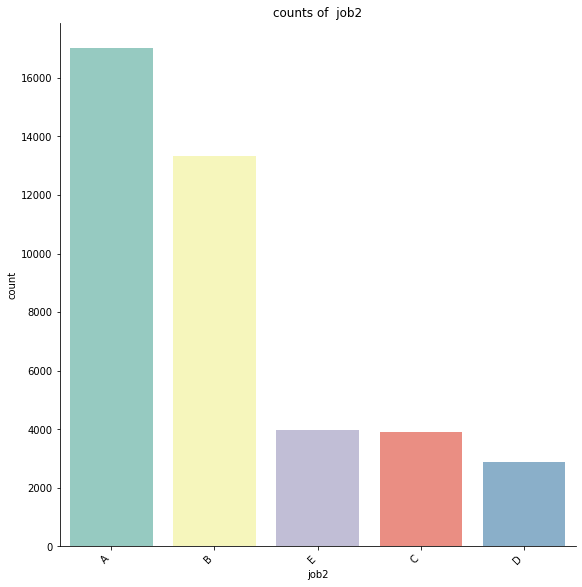

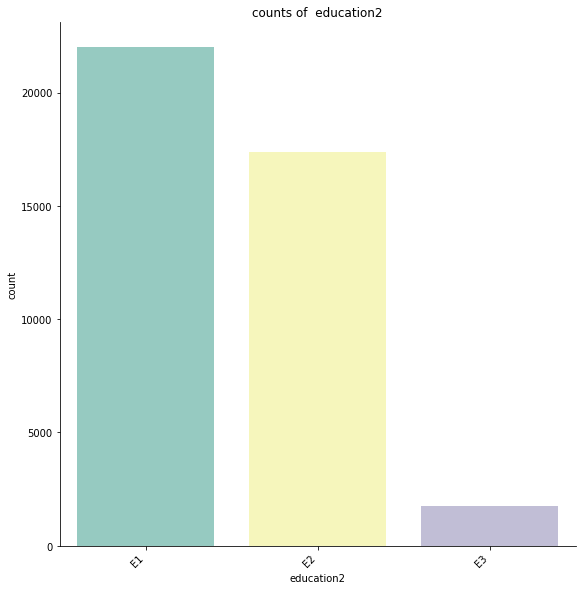

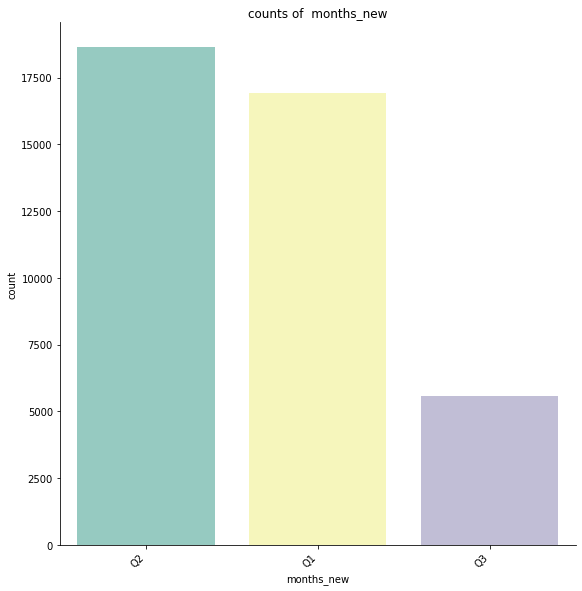

In [48]:
for c in cat:
    catplot(c, df2)

In [49]:
label_encoder = LabelEncoder()
df2['y']= label_encoder.fit_transform(df2['y'])

In [50]:
num, cat= list_datatype(df2)
cat

['marital',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'job2',
 'education2',
 'months_new']

In [51]:
#df_preprocess = pd.get_dummies(data=df, columns= cat)

In [52]:
df2['y'].value_counts()

0    36480
1     4628
Name: y, dtype: int64

In [53]:
# Under sample the code

no , yes = df2['y'].value_counts()
no_users = df2[df2['y'] == 0]
yes_users = df2[df2['y'] == 1]

no_sample = no_users.sample(yes)
under_sample = pd.concat([no_sample,yes_users], axis = 0)

In [54]:
under_sample['y'].value_counts()

1    4628
0    4628
Name: y, dtype: int64

In [55]:
# Dimensionality Reduction

In [56]:
X = under_sample.drop('y', axis=1).reset_index(drop = True)
y = under_sample['y']

In [57]:
num_under , cat_under = list_datatype(X)

scaler = StandardScaler()
pt = PowerTransformer()
rt = RobustScaler()

cat_X = pd.get_dummies(X[cat_under])

scaled_X = scaler.fit_transform(X[num_under])
power_X = pt.fit_transform(X[num_under])
robust_X = rt.fit_transform(X[num_under])


scaled_df = pd.DataFrame(scaled_X , columns = num_under)
power_df = pd.DataFrame(power_X , columns = num_under)
robust_df = pd.DataFrame(robust_X , columns = num_under)
log_X = np.log(X[num_under])


In [58]:
X.head()
#cat_X.shape
#scaled_df.shape

,marital,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job2,education2,months_new,age_cut
0,single,no,no,no,cellular,1,0,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,B,E2,Q2,30s
1,married,no,yes,no,telephone,1,0,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,B,E2,Q1,30s
2,married,no,no,yes,telephone,4,0,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,C,E3,Q2,40s
3,married,no,yes,no,telephone,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,A,E1,Q1,40s
4,married,unknown,no,no,cellular,1,0,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,B,E1,Q2,20s


In [59]:
new = pd.merge(cat_X, scaled_df, how = 'inner', left_index = True, right_index = True)

In [60]:
"""
t0 = time.time()
TSNE(n_components=2, random_state=42).fit(new.values)
X_reduced_tsne = TSNE.transform(new.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

"""

# PCA Implementation
t0 = time.time()
pca = PCA(n_components=5, random_state=42)
pca.fit(new.values)
X_reduced_pca = pca.transform(new.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 0.073 s


In [61]:
pca.explained_variance_ratio_

array([0.3275333 , 0.12139732, 0.08946606, 0.07654652, 0.04823991])

In [62]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X_reduced_pca, y):
    print("Train:", train_index, "Test:", test_index)
    pca_Xtrain, pca_Xtest = X_reduced_pca[train_index], X_reduced_pca[test_index]
    pca_ytrain, pca_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 926  927  928 ... 9253 9254 9255] Test: [   0    1    2 ... 5551 5552 5553]
Train: [   0    1    2 ... 9253 9254 9255] Test: [ 926  927  928 ... 6476 6477 6478]
Train: [   0    1    2 ... 9253 9254 9255] Test: [1852 1853 1854 ... 7401 7402 7403]
Train: [   0    1    2 ... 9253 9254 9255] Test: [2778 2779 2780 ... 8327 8328 8329]
Train: [   0    1    2 ... 8327 8328 8329] Test: [3703 3704 3705 ... 9253 9254 9255]


In [63]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "MLP": MLPClassifier(),
    "XGB": xgb.XGBClassifier()
}

In [64]:
for key, classifier in classifiers.items():
    classifier.fit(pca_Xtrain, pca_ytrain)
    training_score = cross_val_score(classifier, pca_Xtrain, pca_ytrain, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 59.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 41.0 % accuracy score
Classifiers:  MLPClassifier Has a training score of 50.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 44.0 % accuracy score


In [65]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(pca_Xtrain, pca_ytrain)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

xgb_params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

grid_xgb = GridSearchCV(xgb.XGBClassifier(), xgb_params)
grid_xgb.fit(pca_Xtrain, pca_ytrain)
# KNears best estimator
xgb_estimators = grid_xgb.best_estimator_


In [66]:
log_reg_score = cross_val_score(log_reg,pca_Xtrain , pca_ytrain, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


xgb_score = cross_val_score(xgb_estimators, pca_Xtrain, pca_ytrain, cv=5)
print('XGB Cross Validation Score', round(xgb_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  64.36%
XGB Cross Validation Score 53.06%


In [67]:
def plot_learning_curve(estimator1, estimator2, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    f, ax = plt.subplots(2, figsize=(20,14), sharey=True)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax[0].plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax[0].plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax[0].set_title("Logistic Regression Learning Curve", fontsize=14)
    ax[0].set_xlabel('Training size (m)')
    ax[0].set_ylabel('Score')
    ax[0].grid(True)
    ax[0].legend(loc="best")
    
     # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax[1].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax[1].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax[1].plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax[1].plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax[1].set_title("xgb Learning Curve", fontsize=14)
    ax[1].set_xlabel('Training size (m)')
    ax[1].set_ylabel('Score')
    ax[1].grid(True)
    ax[1].legend(loc="best")
    
    

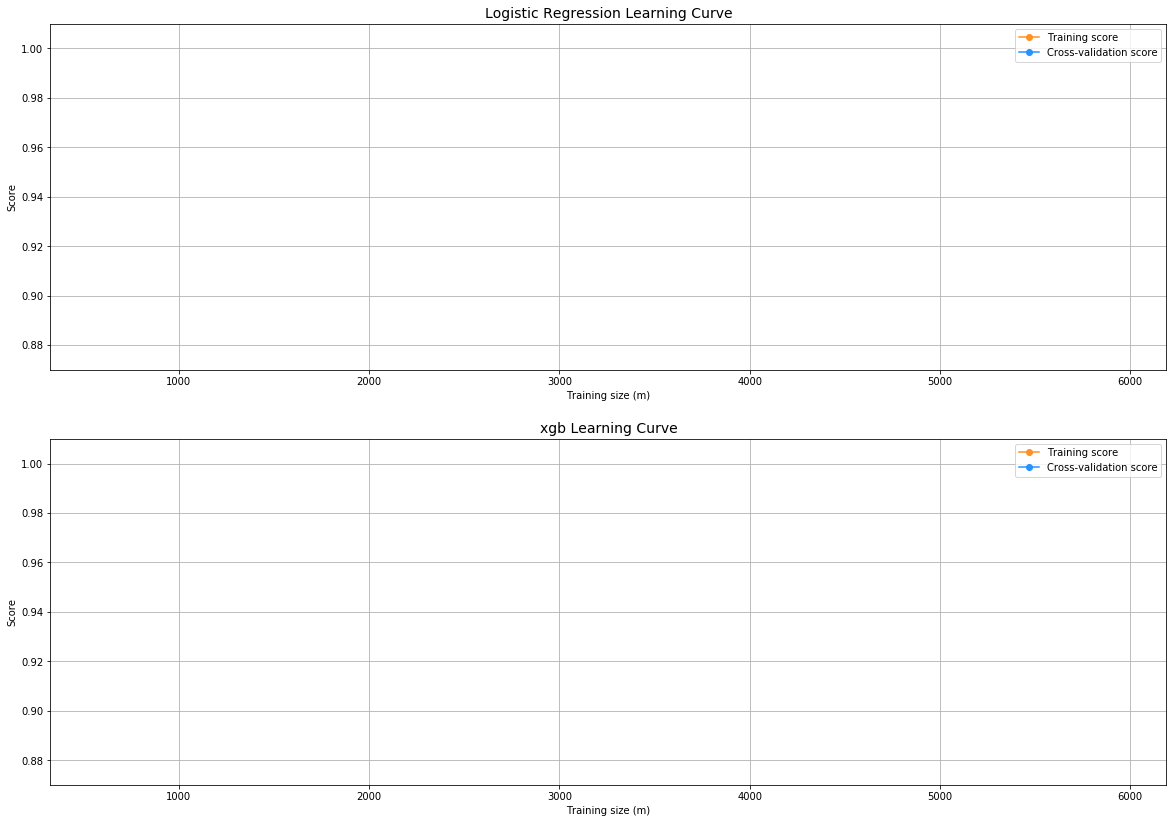

In [68]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, xgb_estimators, pca_Xtrain, pca_ytrain, (0.87, 1.01), cv=cv, n_jobs=4)

In [69]:
log_reg_pred = cross_val_predict(log_reg, pca_Xtrain, pca_ytrain, cv=5,
                             method="decision_function")

xgb_pred = cross_val_predict(xgb_estimators, pca_Xtrain, pca_ytrain, cv=5)

In [70]:
print('Logistic Regression: ', roc_auc_score(pca_ytrain, log_reg_pred))
print('XGB : ', roc_auc_score(pca_ytrain, xgb_pred))

Logistic Regression:  0.6126901428937624
XGB :  0.5305484784410497


In [71]:
log_fpr, log_tpr, log_thresold = roc_curve(pca_ytrain, log_reg_pred)
xgb_fpr, xgb_tpr, knear_threshold = roc_curve(pca_ytrain, xgb_pred)

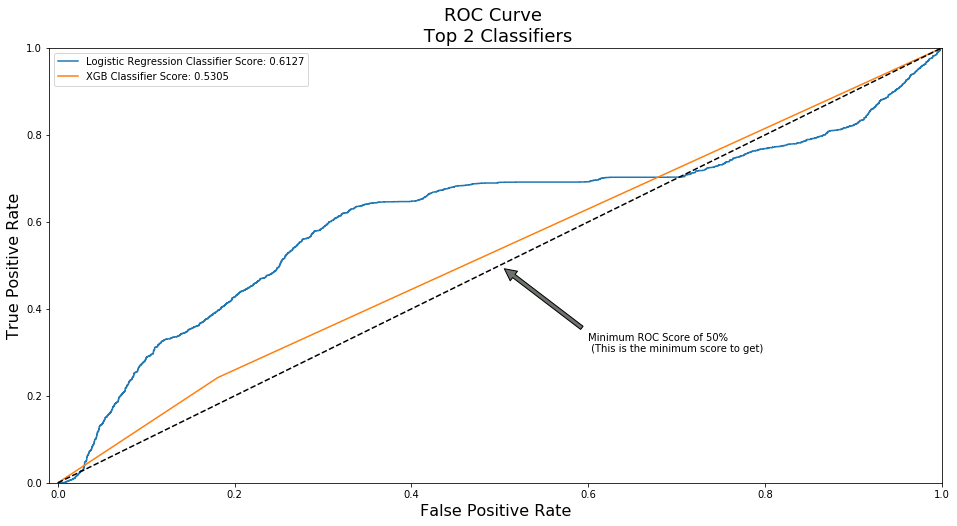

In [72]:
def graph_roc_curve_multiple(log_fpr, log_tpr, xgb_fpr, xgb_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 2 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(pca_ytrain, log_reg_pred)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGB Classifier Score: {:.4f}'.format(roc_auc_score(pca_ytrain, xgb_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, xgb_fpr, xgb_tpr)
plt.show()

In [73]:
y_pred = log_reg.predict(pca_Xtrain)

# Overfitting Case
print('---' * 45)
#print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(pca_ytrain, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(pca_ytrain, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(pca_ytrain, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(pca_ytrain, y_pred)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------
Recall Score: 0.65
Precision Score: 0.68
F1 Score: 0.67
Accuracy Score: 0.68
---------------------------------------------------------------------------------------------------------------------------------------


In [74]:
X_df = df2.drop('y', axis=1).reset_index(drop = True)
y_df = df2['y']

num , cat = list_datatype(X_df)

pt = PowerTransformer()
cat_X = pd.get_dummies(X_df[cat])

power_X = pt.fit_transform(X_df[num])

power_df = pd.DataFrame(power_X , columns = num)

new_df = pd.merge(cat_X, power_df, how = 'inner', left_index = True, right_index = True)

In [75]:
# PCA Implementation
t0 = time.time()
pca = PCA(n_components=5, random_state=42)
pca.fit(new_df.values)
X_reduced_pca = pca.transform(new_df.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 0.6 s


In [76]:
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
for train, test in sss.split(X_reduced_pca, y_df.values):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(X_reduced_pca[train], y_df.iloc[train].values)
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(X_reduced_pca[test])
    
    accuracy_lst.append(pipeline.score(X_reduced_pca[test], X_reduced_pca[test]))
    precision_lst.append(precision_score(X_reduced_pca[test], prediction))
    recall_lst.append(recall_score(X_reduced_pca[test], prediction))
    f1_lst.append(f1_score(X_reduced_pca[test], prediction))
    auc_lst.append(roc_auc_score(X_reduced_pca[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [ ]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

In [ ]:
y_score = best_est.decision_function(original_Xtest)

In [ ]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [ ]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [ ]:
sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [ ]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

In [ ]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

In [ ]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

In [ ]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df